# 1.0 Overall Task Statistics

# Initial Setup

## Jupyter Extensions

Load [watermark](https://github.com/rasbt/watermark) to see the state of the machine and environment that's running the notebook. To make sense of the options, take a look at the [usage](https://github.com/rasbt/watermark#usage) section of the readme.

In [1]:
# Load `watermark` extension
%load_ext watermark

In [2]:
# Display the status of the machine and other non-code related info
%watermark -m -g -b -h

Compiler    : GCC 13.3.0
OS          : Linux
Release     : 5.15.0-122-generic
Machine     : x86_64
Processor   : x86_64
CPU cores   : 8
Architecture: 64bit

Hostname: apra-xps13

Git hash: c55d0de0981478b98a3e4597e16790321e153e35

Git branch: master



Load [autoreload](https://ipython.org/ipython-doc/3/config/extensions/autoreload.html) which will always reload modules marked with `%aimport`.

This behavior can be inverted by running `autoreload 2` which will set everything to be auto-reloaded *except* for modules marked with `%aimport`.

In [3]:
# Load `autoreload` extension
%load_ext autoreload

In [4]:
# Set autoreload behavior
%autoreload 1

Load `matplotlib` in one of the more `jupyter`-friendly [rich-output modes](https://ipython.readthedocs.io/en/stable/interactive/plotting.html). Some options (that may or may not have worked) are `inline`, `notebook`, and `gtk`.

In [5]:
# Set the matplotlib mode
%matplotlib inline

## Imports

In [6]:
# Standard library imports
from pathlib import Path

# Third party
import cv2
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from loguru import logger

%aimport hmdcpd.visualization
%aimport hmdcpd.analysis
from hmdcpd import (
    visualization, 
    analysis,
)

%aimport bouncing_ball_task.bouncing_ball
%aimport bouncing_ball_task.human_bouncing_ball
%aimport bouncing_ball_task.utils.pyutils
%aimport bouncing_ball_task.utils.taskutils
%aimport bouncing_ball_task.utils.visualize
%aimport bouncing_ball_task.utils.gif
from bouncing_ball_task.utils import pyutils, visualize, gif
from bouncing_ball_task import human_bouncing_ball as hbb
from bouncing_ball_task import index

# Display  versions of everything
%watermark -v -iv

Python implementation: CPython
Python version       : 3.12.7
IPython version      : 8.28.0

seaborn           : 0.13.2
bouncing_ball_task: 0.0.0
matplotlib        : 3.9.2
pandas            : 2.2.3
numpy             : 2.1.2
cv2               : 4.10.0



In [7]:
# Suppress sci notation
np.set_printoptions(suppress=True)
pd.set_option('display.float_format', lambda x: '%.5f' % x)

# Loading Task Instance

In [8]:
# # Task Parameters
# human_video_parameters = {
#     "size_frame": (size_frame := (256, 256)),
#     "ball_radius": (ball_radius := 10),
#     "dt": (dt := 0.1),
#     "total_videos": (batch_size := 1000),
#     "mask_center": (mask_center := 0.5),
#     "mask_fraction": (mask_fraction := 1 / 3),
#     "velocity_lower": (velocity_lower := 1 / 12.5),
#     "velocity_upper": (velocity_upper := 1 / 7.5),
#     "num_y_velocities": (num_y_velocities := 2),
#     "pccnvc_lower": (pccnvc_lower := 0.0075),
#     "pccnvc_upper": (pccnvc_upper := 0.075),
#     "pccovc_lower": (pccovc_lower := 0.05),
#     "pccovc_upper": (pccovc_upper := 0.95),
#     "num_pccnvc": (num_pccnvc := 2),
#     "num_pccovc": (num_pccovc := 3),
#     "pvc": (probability_velocity_change := 0.0),
#     "num_pos_endpoints": (num_pos_endpoints := 5),
#     "p_catch_trials": (p_catch_trials := 0.05),
#     "bounce_offset": (bounce_offset := 2/5),
#     "border_tolerance_outer": (border_tolerance_outer := 2.0),
#     "border_tolerance_inner": (border_tolerance_inner := 1.0),
#     "bounce_straight_split": (bounce_straight_split := 0.5),
#     "use_logger": False,
#     "print_stats": True,
# }

# task_parameters = {
#     "size_frame": size_frame,
#     "ball_radius": ball_radius,
#     "target_future_timestep": (target_future_timestep := 1),
#     "dt": dt,
#     "sample_mode": (sample_mode := "parameter_array"),
#     "target_mode": (target_mode := "parameter_array"),
#     "mask_center": mask_center,
#     "mask_fraction": mask_fraction,
#     "mask_color": (mask_color := [127, 127, 127]),
#     "sequence_mode": (sequence_mode := "reverse"),
#     "debug": (debug := True),
#     "sample_velocity_discretely": (sample_velocity_discretely := True),
#     "return_change": (return_change := True),
#     "return_change_mode": (return_change_mode := "source"),
#     "min_t_color_change": (min_t_color_change := 15),
#     "color_mask_mode": (color_mask_mode := "fade"),
#     "initial_timestep_is_changepoint": (initial_timestep_is_changepoint := False),
# }

# size_x, size_y = size_frame

In [42]:
# Task Parameters
human_video_parameters = {
    "size_frame": (size_frame := (256, 256)),
    "ball_radius": (ball_radius := 10),
    "dt": (dt := 0.1),
    "total_videos": (batch_size := 10000),
    "mask_center": (mask_center := 0.5),
    "mask_fraction": (mask_fraction := 1 / 3),
    "velocity_lower": (velocity_lower := 1 / 12.5),
    "velocity_upper": (velocity_upper := 1 / 7.5),
    "num_y_velocities": (num_y_velocities := 2),
    "pccnvc_lower": (pccnvc_lower := 0.0070),
    "pccnvc_upper": (pccnvc_upper := 0.0575),
    "pccovc_lower": (pccovc_lower := 0.05),
    "pccovc_upper": (pccovc_upper := 0.95),
    "num_pccnvc": (num_pccnvc := 2),
    "num_pccovc": (num_pccovc := 3),
    "pvc": (probability_velocity_change := 0.0),
    "num_pos_endpoints": (num_pos_endpoints := 5),
    "p_catch_trials": (p_catch_trials := 0.05),
    "bounce_offset": (bounce_offset := 2/5),
    "border_tolerance_outer": (border_tolerance_outer := 1.25),
    "border_tolerance_inner": (border_tolerance_inner := 1.0),
    "bounce_straight_split": (bounce_straight_split := 0.5),
    "use_logger": False,
    "print_stats": True,
}

task_parameters = {
    "size_frame": size_frame,
    "ball_radius": ball_radius,
    "target_future_timestep": (target_future_timestep := 1),
    "dt": dt,
    "sample_mode": (sample_mode := "parameter_array"),
    "target_mode": (target_mode := "parameter_array"),
    "mask_center": mask_center,
    "mask_fraction": mask_fraction,
    "mask_color": (mask_color := [127, 127, 127]),
    "sequence_mode": (sequence_mode := "reverse"),
    "debug": (debug := True),
    "sample_velocity_discretely": (sample_velocity_discretely := True),
    "return_change": (return_change := True),
    "return_change_mode": (return_change_mode := "source"),
    "min_t_color_change": (min_t_color_change := 15),
    "color_mask_mode": (color_mask_mode := "fade"),
    "initial_timestep_is_changepoint": (initial_timestep_is_changepoint := False),
}

size_x, size_y = size_frame

In [43]:
task, list_samples, list_targets, df_data, dict_metadata = hbb.generate_video_dataset(
    human_video_parameters,
    task_parameters,
    shuffle=False,
)
mask_start = task.mask_start
mask_end = task.mask_end
mask_color = task.mask_color
samples = task.samples
targets = task.targets

Dataset Generation Summary
  Num Total Trials: 10000 (1494 min 54.6 sec)
    length_trials_ms:       89694585
    video_length_min_ms:    8010
    video_length_max_ms:    16470
    video_length_min_f:     178
    video_length_max_f:     366
    ball_radius:            10
    dt:                     0.1
    duration:               45
    exp_scale:              1.0
    border_tolerance_outer: 1.25
    mask_center:            0.5
    mask_fraction:          0.3333333333333333
    size_x:                 256
    size_y:                 256
    num_pos_endpoints:      5
    pvc:                    0.0
    num_y_velocities:       2
    bounce_offset:          0.4
  Num Catch Trials: 500 (66 min 45.0 sec)
    Min Video Length (s):  8.0
    Max Video Length (s):  8.0
    Color Splits:          [np.float64(0.33), np.float64(0.33), np.float64(0.33)]
    pccnvc Splits:         [np.float64(0.5), np.float64(0.5)]
    pccovc Splits:         [np.float64(0.33), np.float64(0.33), np.float64(0.33)]
   

2024-10-16 14:01:05.843 | DEBUG    | bouncing_ball_task.bouncing_ball:color_mask_mode:486 - Running color_mask_mode setter
2024-10-16 14:01:05.844 | DEBUG    | bouncing_ball_task.bouncing_ball:transitioning_change_mode:464 - Running transitioning_change_mode setter
2024-10-16 14:01:05.845 | DEBUG    | bouncing_ball_task.bouncing_ball:sequence_mode:419 - Running sequence_mode setter
2024-10-16 14:01:05.845 | DEBUG    | bouncing_ball_task.bouncing_ball:resample_change_probabilities:512 - Running resample_change_probabilities
2024-10-16 14:01:05.860 | DEBUG    | bouncing_ball_task.bouncing_ball:color_sampling:396 - Running color_sampling setter
2024-10-16 14:01:05.866 | DEBUG    | bouncing_ball_task.bouncing_ball:return_change_mode:450 - Running return_change_mode setter


  Num Bounce Trials: 4750 (714 min 18.8 sec)
    Min Video Length (s):          8.0
    Max Video Length (s):          16.0
    Color Splits:                  [np.float64(0.33), np.float64(0.33), np.float64(0.33)]
    pccnvc Splits:                 [np.float64(0.5), np.float64(0.5)]
    pccovc Splits:                 [np.float64(0.33), np.float64(0.33), np.float64(0.33)]
    Stat Comb Splits:              [np.float64(0.17), np.float64(0.17), np.float64(0.17), np.float64(0.17), np.float64(0.17), np.float64(0.17)]
    End time Splits:               [np.float64(0.2), np.float64(0.2), np.float64(0.2), np.float64(0.2), np.float64(0.2)]
    Left/Right Splits:             [np.float64(0.5), np.float64(0.5)]
    Top/Bottom Splits:             [np.float64(0.5), np.float64(0.5)]
    Velocity Splits:               [np.float64(0.5), np.float64(0.5)]
    Final y position splits        [np.float64(0.46), np.float64(0.26), np.float64(0.16), np.float64(0.09), np.float64(0.04)]
    x=0 - Final y positio

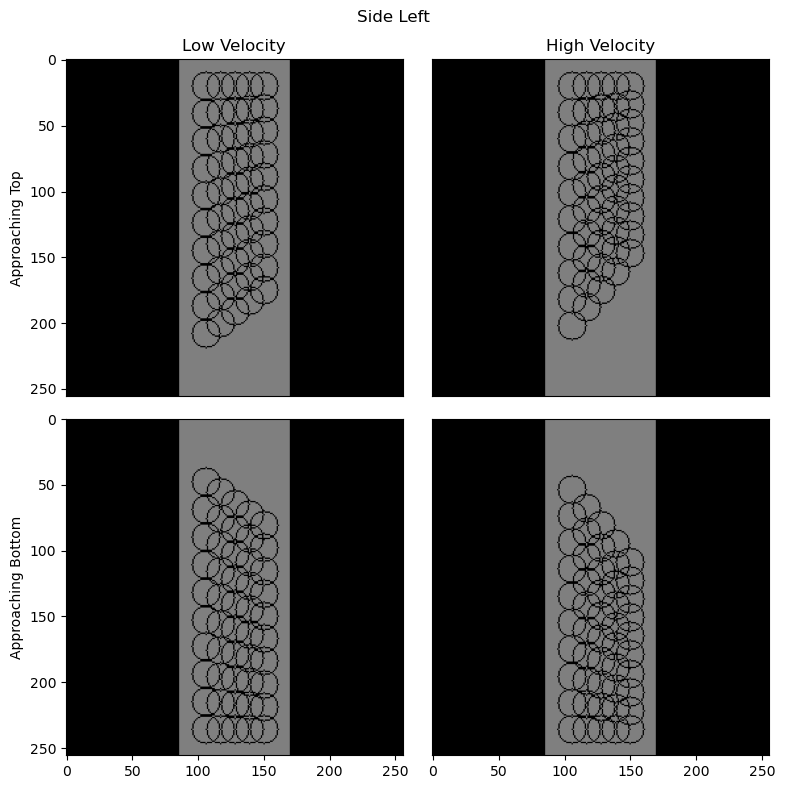

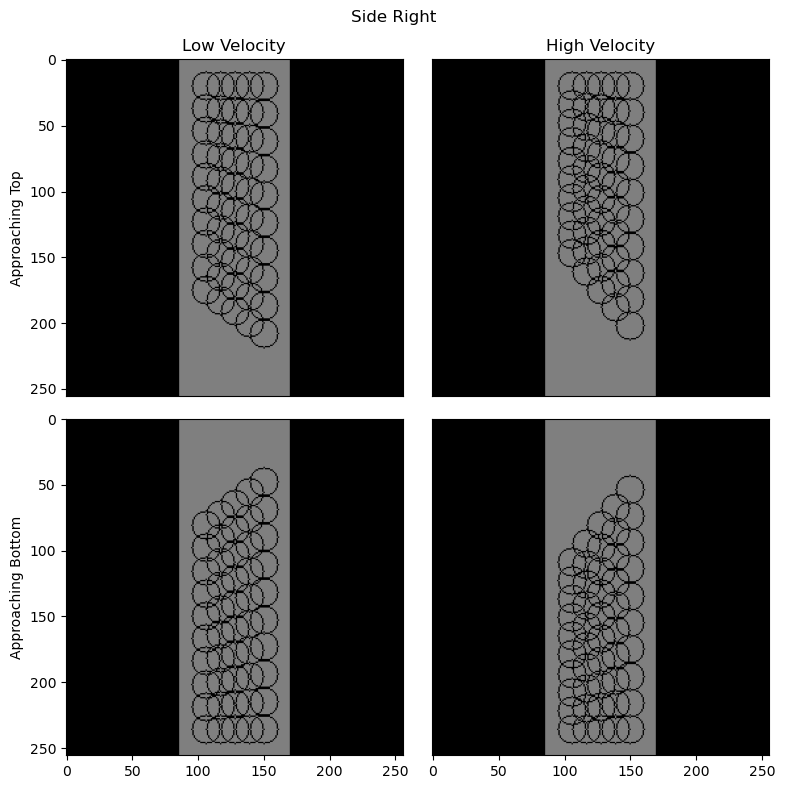

In [44]:
x_pos_sides = dict_metadata["x_grayzone_linspace_sides"]
y_pos_sides = dict_metadata["straight"]["final_y_positions"]

for left_right in np.sort(df_data["side_left_right"].unique())[1:]:
    fig, axs = plt.subplots(2, 2, figsize=(8, 8))
    for top_bottom in np.sort(df_data["side_top_bottom"].unique())[1:]:
        for vel_y in np.sort(df_data["idx_velocity_y"].unique())[1:]:
            frame = np.zeros((*size_frame[::-1], 3), dtype=np.uint8)
            frame[:, mask_start:mask_end, :] = mask_color
            for idx_pos_x in range(dict_metadata["num_pos_endpoints"]):
                for idx_pos_y in range(dict_metadata["num_pos_endpoints"] * 2):
                    frame = cv2.circle(
                        frame,
                        tuple(np.round(
                            np.array(
                                [
                                    x_pos_sides[0, idx_pos_x],
                                    y_pos_sides[
                                        left_right, 
                                        top_bottom, 
                                        vel_y, 
                                        idx_pos_x, 
                                        idx_pos_y
                                    ]
                                ]
                            )
                        ).astype(int).tolist()),
                        ball_radius + 1,
                        color=[0, 0, 0],
                        thickness=1,
                        )
    
            # Display the RGB image
            ax = axs[top_bottom, vel_y]
            ax.imshow(frame)
            if top_bottom == 0:
                ax.set_xticks([])
                if vel_y == 0:
                    ax.set_ylabel("Approaching Top")
            elif vel_y == 0:
                ax.set_ylabel("Approaching Bottom")
                
            if vel_y == 1:
                ax.set_yticks([])
                if top_bottom == 0:
                    ax.set_title("High Velocity")
            elif top_bottom == 0:
                ax.set_title("Low Velocity")
        # axs[top_bottom, vel_y].axis('off')  # Optional: Turn off axis labels
    plt.suptitle(f"Side {'Right' if left_right else 'Left'}")
    plt.tight_layout()
    plt.show()

# Removing Transitioning Color Changes

In [45]:
valid_colors = np.array(
    [
        [255.0, 0.0, 0.0],
        [0.0, 255.0, 0.0],
        [0.0, 0.0, 255.0],
        [127.0, 127.0, 127.0],
    ]
)
timesteps = samples.shape[1]
t_cc = 50

excluded_change_indices = []
for i, sample in enumerate(samples):
    for t in range(timesteps - t_cc, timesteps):
        if np.any(targets[i, t-2, -2:] == 1) and not np.any(
            np.all(
                valid_colors == sample[t, 2:5],
                axis=1,
            )
        ):
            excluded_change_indices.append(i)
            break

In [46]:
len(excluded_change_indices)

78

In [47]:
# print(df_data.iloc[excluded_change_indices])

# idx = 2 # int(df_data.iloc[excluded_change_indices].index[0]) # [df_data["trial"] == "bounce"][df_data["idx_time"] == 0].index[1])
# print(samples[idx, -t_cc:], targets[idx, -t_cc:, -6:])

# Fig - Effective Statistics

Target change indices:
- [-4] - Velocity Change Bounce
- [-3] - Velocity Change Random
- [-2] - Color Change bounce
- [-1] - Color change random

In [48]:
def plot_effective_stats(df_data):
    # Create the subplots
    palette = visualize.get_color_palette(
        ["Low", "High"],
        (("Blues", 1), ("Reds", 1)),
        linspace_range=(0.75, 1),
    )
    palette_trial = visualize.get_color_palette(
        ["Straight", "Catch", "Bounce"],
        (("Blues", 1), ("Wistia", 1), ("Reds", 1)),
        linspace_range=(0.75, 1),
    )
    palette_contingency = visualize.get_color_palette(
        ["Low", "Medium", "High"],
        (("Blues", 1), ("Wistia", 1), ("Reds", 1)),
        linspace_range=(0.75, 1),
    )
    
    plot_params = [
        [
            (
                "PCCNVC_effective",
                "Observed Hazard Rates",
                "Effective Hazard Rate Bins",
                {
                    "hue": "Hazard Rate",
                    "legend": False,
                    "palette": palette,
                }
            ),
            (
                "Color Change Random",
                "Number of Random Color Changes",
                "Random Color Change Bins",
                {
                    "hue": "Hazard Rate",
                    "legend": True,
                    "discrete": True,
                    "palette": palette,
                }
            ),
            (
                "length",
                "Distribution of Video Lengths",
                "Video Length Bins",
                {
                    "hue": "trial",
                    "legend": True,
                    "palette": palette_trial,
                }
            ),
        ],
        [
            (
                "PCCOVC_effective",
                "Observed Trial Contingency",
                "Effective Contingency Bins",
                {
                    "hue": "Contingency",
                    "palette": palette_contingency,
                    "legend": False,
                },
            ),
            (
                "Color Change Bounce",
                "Number of Bounce Color Changes",
                "Bounce Color Changes",
                {
                    "discrete": True,
                    "hue": "Contingency",
                    "palette": palette_contingency,
                    "legend": True,
                }
            ),
            (
                "Bounces",
                "Number of Bounces",
                "Number of Bounces",
                {
                    "discrete": True,
                    "hue": "trial",
                    "palette": palette_trial,
                    "legend": True,
                }
            ),
        ],
    ]
    
    rows = 2
    fig, axes = plt.subplots(
        rows,
        len(plot_params[0]),
        figsize=(len(plot_params[0])*4, rows*4),
    )
    
    for i, row_plots in enumerate(plot_params):
        for j, (col, title, xlabel, plot_dict) in enumerate(row_plots):
            ax = axes[i, j]
            sns.histplot(
                df_data,
                x=col,
                ax=ax,
                **plot_dict,
            )
            ax.set_title(title)
            ax.set_xlabel(xlabel)
            if j != 0:
                ax.set_ylabel(None)
    
    plt.suptitle(f"Task Statstics for {batch_size} Videos")
    plt.tight_layout()
    plt.show()

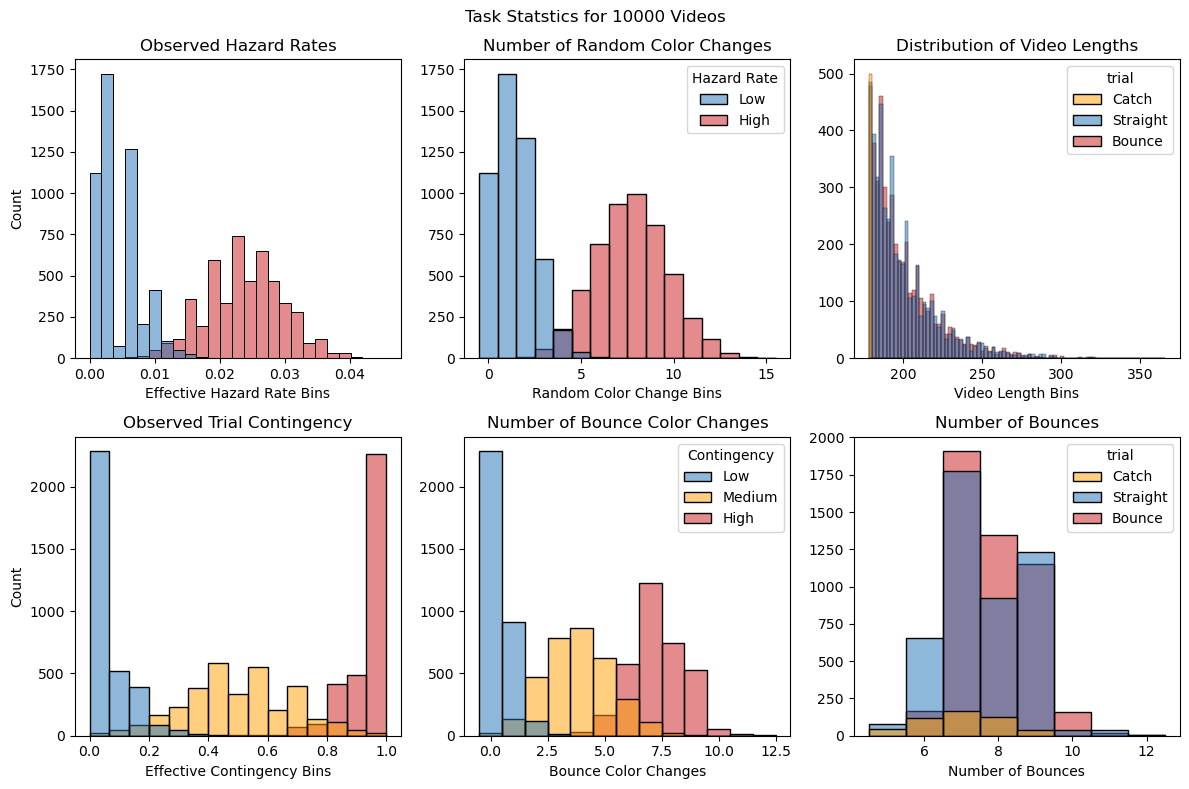

In [49]:
plot_effective_stats(df_data)

# Labels

In [50]:
df_metadata_trials_straight = df_data[
    df_data["trial"] == "Straight"
]
df_metadata_trials_bounce = df_data[
    df_data["trial"] == "Bounce"
]

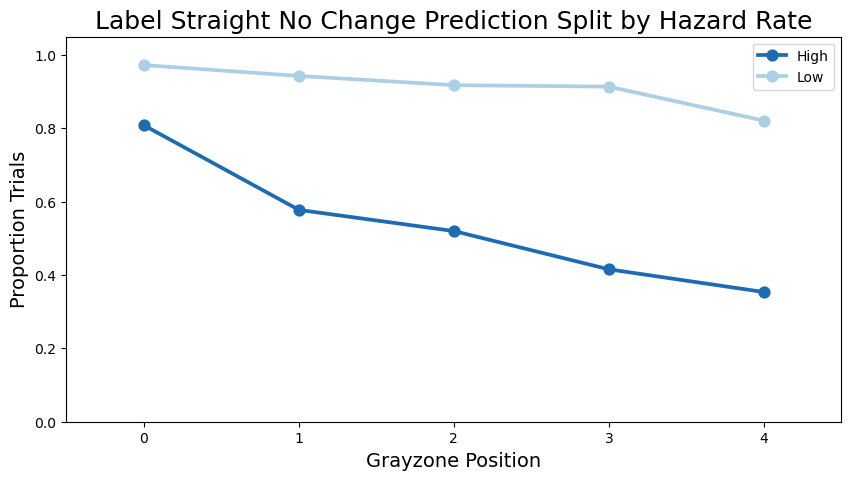

In [51]:
df_nested_position_counts_straight_hazard_label_straight = analysis.response_nested_no_change_prediction_counts(
    df_metadata_trials_straight,
    df_metadata_trials_straight,
    groupby_outer='Hazard Rate',
    label_func_outer=lambda x: x,
    label_title_outer="Hazard Rate",
    groupby_inner='idx_time',
    label_func_inner=lambda pos: str(pos),
    label_title_inner="Grayzone Position",
    as_df=True,
    response_column='correct_response',
)

title = "Label Straight No Change Prediction Split by Hazard Rate"
visualization.plot_color_prediction_counts(
    df_nested_position_counts_straight_hazard_label_straight,
    title,
    hue="Hazard Rate",
    x="Grayzone Position",
    y="No Change",
    palette_labels=["Low", "High"],
    palette_color_counts=(("Blues", 2),),
    palette_linspace_range=(0.333, 1.2),
    plot=sns.pointplot,
    # legend_loc=legend_loc,
)
plt.show()


In [52]:
df_nested_position_counts_straight_hazard_label_straight

,Hazard Rate,Grayzone Position,No Change
0,High,0,0.80842
1,High,1,0.57773
2,High,2,0.52000
3,High,3,0.41561
4,High,4,0.35368
5,Low,0,0.97263
6,Low,1,0.94304
7,Low,2,0.91789
8,Low,3,0.91387
9,Low,4,0.82105
